In [3]:
%matplotlib qt
#%matplotlib nbagg
%matplotlib inline
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Loading using h5py

In [150]:
f = h5py.File('training.h5', 'r')
print(list(f.keys())) # it will show 'training'
dset = f['training']
print(dset)
for dataset_name in dset.keys():
    print(dataset_name)
dataset = dset['polymer'] 
print(dataset)
for sub_dataset_name in dataset.keys():
    print(sub_dataset_name)
Area1=dataset['Area 1']
Area2=dataset['Area 2']
print(Area1, Area2)
for area_dataset_name in Area1.keys():
    print(area_dataset_name)
livemap1=Area1['Live Map 1']
print(livemap1)
for livemap1_dataset_name in livemap1.keys():
    print(livemap1_dataset_name)
SPD=livemap1['SPD']
SPC=livemap1['SPC']
data = SPD[()]
data_shape=data.shape
print(data.shape)
HOSTPARAMS=livemap1['HOSTPARAMS']
print(HOSTPARAMS.dtype)
MAPIMAGEIPR=livemap1['MAPIMAGEIPR']
#print(MAPIMAGEIPR.dtype)
microns_per_pixel_x = MAPIMAGEIPR['MicronsPerPixelX']
#microns_per_pixel_y = MAPIMAGEIPR['MicronsPerPixelY']
print(microns_per_pixel_x)


# Iterate over the structured array and print each item
def MAPIMAGEIPR_np():
    MAPIMAGEIPR_np = np.array(MAPIMAGEIPR, dtype={
    'names': ['Version', 'ImageType', 'Label', 'SMin', 'SMax', 'Par_Color', 'EdsPresetMode', 'EdsPresetTime', 'EdsMapDataType', 'TiltCorrected', 'RasterMode', 'ChannelStart', 'ChannelEnd', 'IntDummy1', 'IAdc', 'ISize', 'IBits', 'NReads', 'NFrames', 'FDwell', 'KVolt', 'Tilt', 'TakeOff', 'Magnification', 'WorkingDistance', 'MicronsPerPixelX', 'MicronsPerPixelY', 'NumberOfCommentLines', 'TextLines', 'Fpar1', 'NOverlayElements', 'OverlayColors', 'XmpEdiTimeCnst', 'Fpar'],
    'formats': ['<i2', '<i2', ('u1', (8,)), '<i2', '<i2', '<i2', '<i2', '<i4', '<i2', '<i2', '<i2', '<i2', '<i2', '<i4', '<i2', '<i2', '<i2', '<i2', '<i2', '<f4', '<i2', '<i2', '<i2', '<i4', '<i2', '<f4', '<f4', '<i2', ('u1', (128,)), ('<f4', (4,)), '<i2', ('<i2', (16,)), '<f4', ('<f4', (2,))],
    'offsets': [0, 2, 4, 12, 14, 16, 18, 20, 24, 26, 28, 30, 32, 36, 40, 42, 44, 46, 48, 52, 56, 58, 60, 64, 68, 72, 76, 80, 82, 212, 228, 230, 264, 268],
    'itemsize': 276})
    for i, item in enumerate(MAPIMAGEIPR_np):
        print(f"Item {i + 1}:")
        for field_name in MAPIMAGEIPR.dtype.names:
            print(f"{field_name}: {item[field_name]}")
        print("\n")
        
def print_param(x): #
    for i, item in enumerate(x):
        print(f"Item {i + 1}:")

        for field_name, field_value in zip(SPC.dtype.names, item):
            if field_value.dtype.names is not None:
                # If the field is another structured array, print its fields
                print(f"  {field_name}:")
                for subfield_name, subfield_value in zip(field_value.dtype.names, field_value):
                    print(f"    {subfield_name}: {subfield_value}")
            else:
                # If the field is not a structured array, print its value
                print(f"  {field_name}: {field_value}")

        print("\n")
print_param(SPC)
start_energy=SPC['StartEnergy']
end_energy=SPC['EndEnergy']
num_point=SPC['NumberOfPoints']
data_start=SPC['DataStart']
print(start_energy,end_energy)

eVperch=SPC['evPch']

['training']
<HDF5 group "/training" (1 members)>
polymer
<HDF5 group "/training/polymer" (2 members)>
Area 1
Area 2
<HDF5 group "/training/polymer/Area 1" (7 members)> <HDF5 group "/training/polymer/Area 2" (6 members)>
FOVIMAGE
FOVIMAGECOLLECTIONPARAMS
FOVIPR
HOSTPARAMS
Live Map 1
Live Map 1 ROI1
ZAF AtLineScan 1
<HDF5 group "/training/polymer/Area 1/Live Map 1" (15 members)>
CPS
ELEMENTOVRLAYIMGCOLLECTIONPARAMS
HOSTPARAMS
MAPIMAGE
MAPIMAGECOLLECTIONPARAMS
MAPIMAGEIPR
PHASEOVERLAYDAT
PHASEOVERLAYIMG
PHASEOVERLAYIPR
PHASEOVRLAYIMGCOLLECTIONPARAMS
PHASES
ROIs
SPC
SPCXML
SPD
(84, 128, 1000)
{'names':['StageXPosition','StageYPosition','StageZPosition','Rotation','Tilt','PreTilt','TiltAxis','Magnification','KV','WD','SpotSize','AutoColCtl','BeamCurrent','Id'], 'formats':['<f8','<f8','<f8','<f8','<f8','<f8','<i4','<f8','<f8','<f8','<f8','<i2','<f8','S38'], 'offsets':[0,8,16,24,32,40,48,56,64,72,80,88,96,104], 'itemsize':144}
[6.234375]
Item 1:
  FileFormatVersion: 0.8600000143051147
  AppV

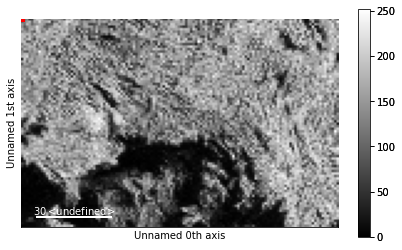

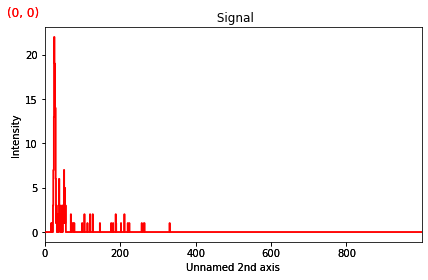

In [153]:
data_reshaped = data.reshape((data_shape[0], data_shape[1], data_shape[2]))

# Create a hyperspy signal
signal = hs.signals.Signal1D(data_reshaped)

#signal.axes_manager.gui()
# Show the signal
signal.plot()

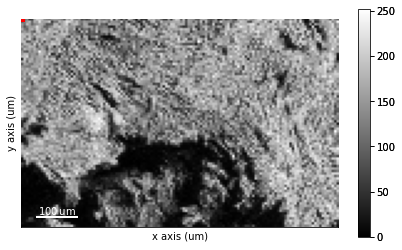

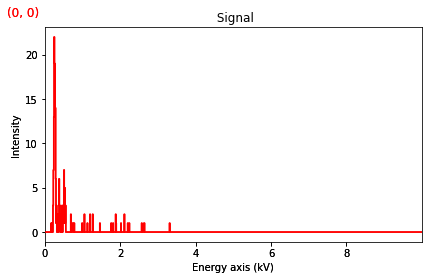

In [154]:
signal.axes_manager[0].name='x'
signal.axes_manager[0].units='um'
signal.axes_manager[0].scale=microns_per_pixel_x
signal.axes_manager[1].name='y'
signal.axes_manager[1].units='um'
signal.axes_manager[1].scale=microns_per_pixel_x
signal.axes_manager[2].units='kV'
signal.axes_manager[2].name='Energy'
signal.axes_manager[2].scale=eVperch/1000 #1000 to convert into kV
signal.axes_manager[2].offset=0
signal.plot()

0.0

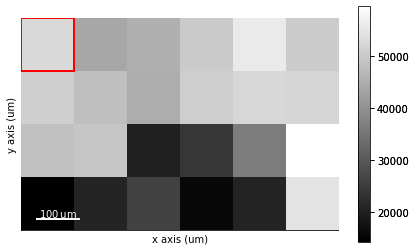

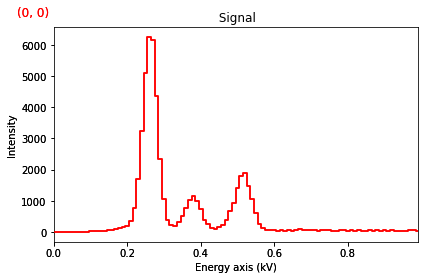

In [155]:
a=signal.rebin(scale=(20,20,1))
a.isig[0.:1.].plot()
signal.axes_manager[2].offset

In [147]:
signal

<Signal1D, title: , dimensions: (128, 84|1000)>